# CCL example of cells and Correlations
In this example, we will illustrate CCL's functions of using cell

In [8]:
import numpy as np
import pylab as plt
import pyccl as ccl

## Define cosmology:
First step will be to define a cosmology object

In [9]:
cosmo = ccl.Cosmology(Omega_c = 0.27, Omega_b = 0.045, h = 0.67, sigma8 = 0.83, n_s = 0.96)

The CCL weaklensing tracers requires a number density as a function of redshift, dN/dz. We define an example here.

In [10]:
z = np.linspace(0., 3., 200)
i_lim = 26. # Limiting i-band magnitude
z0 = 0.0417*i_lim - 0.744

Ngal = 46. * 100.31 * (i_lim - 25.) # Normalisation, galaxies/arcmin^2
pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
dNdz = Ngal * pz # Number density distribution
b = 1.5*np.ones(200)

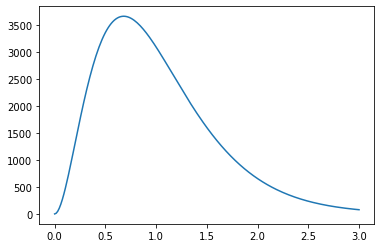

In [11]:
plt.plot(z, dNdz)
plt.show()

## Create Tracer objects

CCL manages auto- and cross-spectrum calculations through Tracer objects. For the sake of this example we will define two tracers: one for lensing and one for clustering.


In [19]:
lens1 = ccl.WeakLensingTracer(cosmo, dndz=(z, dNdz))
clu1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z,dNdz), bias=(z,b))

The argument set to False in the first statement specifies that we are ignoring intrinsic alignments. For the clustering tracer, we are excluding RSD bias with the  False statement. 


If we want to include intrinsic alignment, we can make a tracer where we include an IA amplitude as a funciton of redshift

In [31]:
bias_ia = 1*np.ones_like(z)
lens1_ia = ccl.WeakLensingTracer(cosmo, dndz = (z,dNdz), ia_bias = (z,bias_ia))

## Calculating the angular power spectra
Having created the tracers, we can obtain the angular powerspectrum. we need to start by specifiying the angular wave numbers we are interested in

In [45]:
ell = np.arange(2, 100)

cls = ccl.angular_cl(cosmo, lens1, lens1, ell)
cls_ia = ccl.angular_cl(cosmo, lens1_ia, lens1_ia, ell)
cls_ia2 = ccl.angular_cl(cosmo, lens1, lens1_ia, ell)
cls_clu = ccl.angular_cl(cosmo, clu1, clu1, ell)

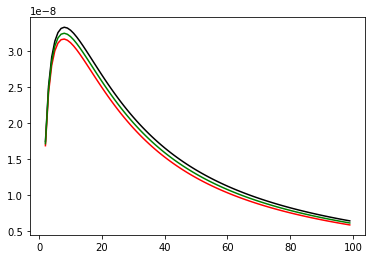

In [46]:
plt.plot(ell, cls, 'k-')
plt.plot(ell, cls_ia, 'r-')
plt.plot(ell, cls_ia2, 'g-')
plt.show()

### CMB lensing cross-correlation:
CCL also have the posibility of obtaining CMB lensing angular power spectrum:

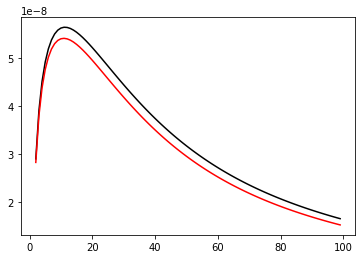

In [47]:
cmbl = ccl.CMBLensingTracer(cosmo, 1090.)
cls_cmb_cross_lens1 = ccl.angular_cl(cosmo, lens1, cmbl, ell)
cls_cmb_cross_lens1ia = ccl.angular_cl(cosmo,lens1_ia,cmbl, ell)

plt.plot(ell, cls_cmb_cross_lens1, 'k-')
plt.plot(ell, cls_cmb_cross_lens1ia, 'r-')
plt.show()

## Correlation functions
next lets show how CCL can calculate the correlation functions:

In [48]:
theta_deg = np.logspace(-1, np.log10(5.), 20) # Theta is in degrees

xi_plus = ccl.correlation(cosmo, ell, cls, theta_deg, corr_type='L+', method='FFTLog')
xi_plus_ia = ccl.correlation(cosmo, ell, cls_ia, theta_deg, corr_type='L+', method='FFTLog')
xi_minus = ccl.correlation(cosmo, ell, cls, theta_deg, corr_type='L-', method='FFTLog')

xi_clu = ccl.correlation(cosmo, ell, cls_clu, theta_deg, corr_type='GG', method='FFTLog')

We can then plot the correlations, first for lensing:

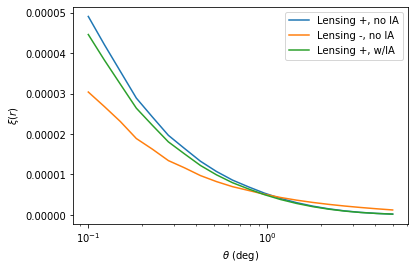

In [49]:
plt.plot(theta_deg, xi_plus, label='Lensing +, no IA')
plt.plot(theta_deg, xi_minus, label='Lensing -, no IA')
plt.plot(theta_deg, xi_plus_ia, label='Lensing +, w/IA')

plt.xscale('log')
plt.legend(loc='upper right')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\xi (r)$')
plt.show()

And then for galaxy-galaxy clustering:

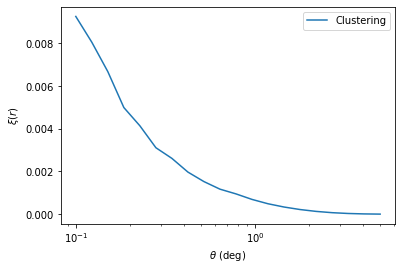

In [50]:
plt.plot(theta_deg, xi_clu, label='Clustering')

plt.xscale('log')
plt.legend(loc='upper right')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\xi (r)$')
plt.show()